# Project: Investigating [Medical Appointment No Shows Dataset](https://www.kaggle.com/joniarroba/noshowappointments) 

![title](img/doctor-showing-examination-results-to-the-patient-216-medium.jpg)
[image refrence and license](https://fshoq.com/free-photos/p/216/doctor-showing-examination-results-to-the-patient)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data I'm going to work with is about people who have a medical appointment and whether they attend it or not.

questions I will try to investigate are 
* What factors affect someone's attendance at the appointment?
* what is the percentage of people who didn't show for their appointment?
* how age affects people attending their appointments?
* how the scholarship program affects people's attendance at their appointments?
* how hipertension affect's people attendance at their appointments?
* how diabetes affects people's attendance at their appointments?
* how alcoholism affects people's attendance at their appointments?
* how handcap affects people's attendance at their appointments?
* how SMS receiving affect's people attendance at their appointments?
* how the neighborhood affect's people attendance at their appointments?
* how the day of the week that the appointment was scheduled affects the attendance of people at their appointments?
* how gender affect's people attendance at their appointments?

importing libraries and loading the data 

In [1]:
import pandas as pd # importing pandas to work with dataframes
import numpy as np # importing numpy for numirical operations
import matplotlib.pyplot as plt # importing matplotlib for visualizations 

# jupyter notebook magic line to show visualizations in line
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('Medical_Appointment_No_Shows.csv') # loading the data into data frame (df)

### Data Dictionary from [kaggel](https://www.kaggle.com/joniarroba/noshowappointments)

> #### 01 - PatientId
Identification of a patient
> #### 02 - AppointmentID
Identification of each appointment
> #### 03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
> #### 04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
> #### 05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
> #### 06 - Age
How old is the patient.
> #### 07 - Neighbourhood
Where the appointment takes place.
> #### 08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
> #### 09 - Hipertension
True or False
> #### 10 - Diabetes
True or False
> #### 11 - Alcoholism
True or False
> #### 12 - Handcap
True or False
> #### 13 - SMS_received
1 or more messages sent to the patient.
> #### 14 - No-show
True or False.


exploring the data

In [3]:
df.head(10) # shoing the first 10 rows of the data set

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.shape # getting the number of columns and rows in the data in the form of (rows, coulmns)

(110527, 14)

In [5]:
df.info() # get the dataframe general informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum() # get the number of duplicated rows in the data

0

as we can see from the previous two cells that we have no duplicated rows but the attributes of columns should be renamed for easier investigation

In [7]:
# renaming the attributes to more useable format
original_column_names = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show'] # old columns names
new_column_names = ['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship','hipertension','diabetes','alcoholism','handcap','sms_received','no_show'] # new columns names

# looping over the data set columns to change their names
for i in range(len(original_column_names)) :
    df.rename(columns={original_column_names[i]: new_column_names[i]}, inplace = True)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


as we can see the 'scheduled_day' and 'appointmentDay' should be in datetime format so let's change them

In [8]:
# changing the format of 'scheduled_day' column from string to datetime for easier use 
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], format='%Y-%m-%dT%H:%M:%SZ') 

In [9]:
# changing the format of 'appointment_day' column from string to datetime for easier use 
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format='%Y-%m-%dT%H:%M:%SZ')

In [10]:
df.info() # making sure that our changes in the 'scheduled_day' and 'appointment_day' columns are presented properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


as we can see that the data in the 'no_show' column is in the format of a string but I want to change it to binary data so 1 would refer to yes and 0 refers to no 

In [11]:
# changing yes by 1 and no by 0 for easier use
df['no_show'] = df['no_show'].str.replace('Yes','1');
df['no_show'] = df['no_show'].str.replace('No','0');

In [12]:
df.head() # making sure that our changes in the 'no_show' column are presented properly by viewing the first 5 rows in the data

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [13]:
# changing the type of no_show column from string to int
df['no_show'] = df['no_show'].astype('int')

In [14]:
df.info() # making sure that our changes inthe 'no_show' column are presented properly by showing general info of th data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int32
dtypes: datetime64[ns](2), float64(1), int32(1), int64(8), object(2)
memory usage: 11.4+ MB


now let's see the numbers of unique data

In [15]:
df.nunique() # get the number of unique values in the data set

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

it seems fine but there are some non-realistic things like there are 104 unique values in the age column and there are 5 unique values in the handcap column which should only be 2 (0,1)now let's see the numbers of unique data

In [16]:
df.describe()['age'] # get useful statistical description of the age column

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

let's look at the age data and see all the unique values

In [17]:
np_arr = df.to_numpy() # convert the data set to numpy array 

In [18]:
ages_arr = np_arr[:,5] # get age column from the numpy array of the df
unique_ages = set(ages_arr) # convert the age list to set to only get the uniqe values
print(unique_ages) # print age uniqe values

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1}


as we can see from the couple of cells above that there are ages that are less than 0 in the age column (-1) which could not happen let's look at the age data and see all the unique values

In [19]:
df[df['age'] < 0] # print the rows that contains age < 0

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


as it's only one row dropping it wouldn't affect our data 

In [20]:
df = df.drop(99832) # drop the one column that have wrong age

and there are some data with ages older than 100 years let's check them

In [21]:
df[df['age'] > 100] # print the rows with age > 100 to investigate them

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,0
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,1
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,1
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,1
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,0
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,0
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,0


the data of ages now seems nice

let's check now the data of handcap and its 5 unique values 

In [22]:
df['handcap'].value_counts() # print every handcap unique value with its corresponding number of how many times it's in our data

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

 so after some research I found that the handcap values are not (true, false) only but it indicates also the number of disabilities a person has.
[reference](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356)

so I'm keeping it without changes

let's now split our data by the no show column to better analyse it 

In [23]:
df_no_show_1 = df[df['no_show'] == 1] # creating a data frame that only contains the people who didn't show at their appointment
df_no_show_0 = df[df['no_show'] == 0] # creating a data frame that only contains the people who didn show at their appointment

<a id='eda'></a>
## Exploratory Data Analysis

## let's plot the distribution of the data :

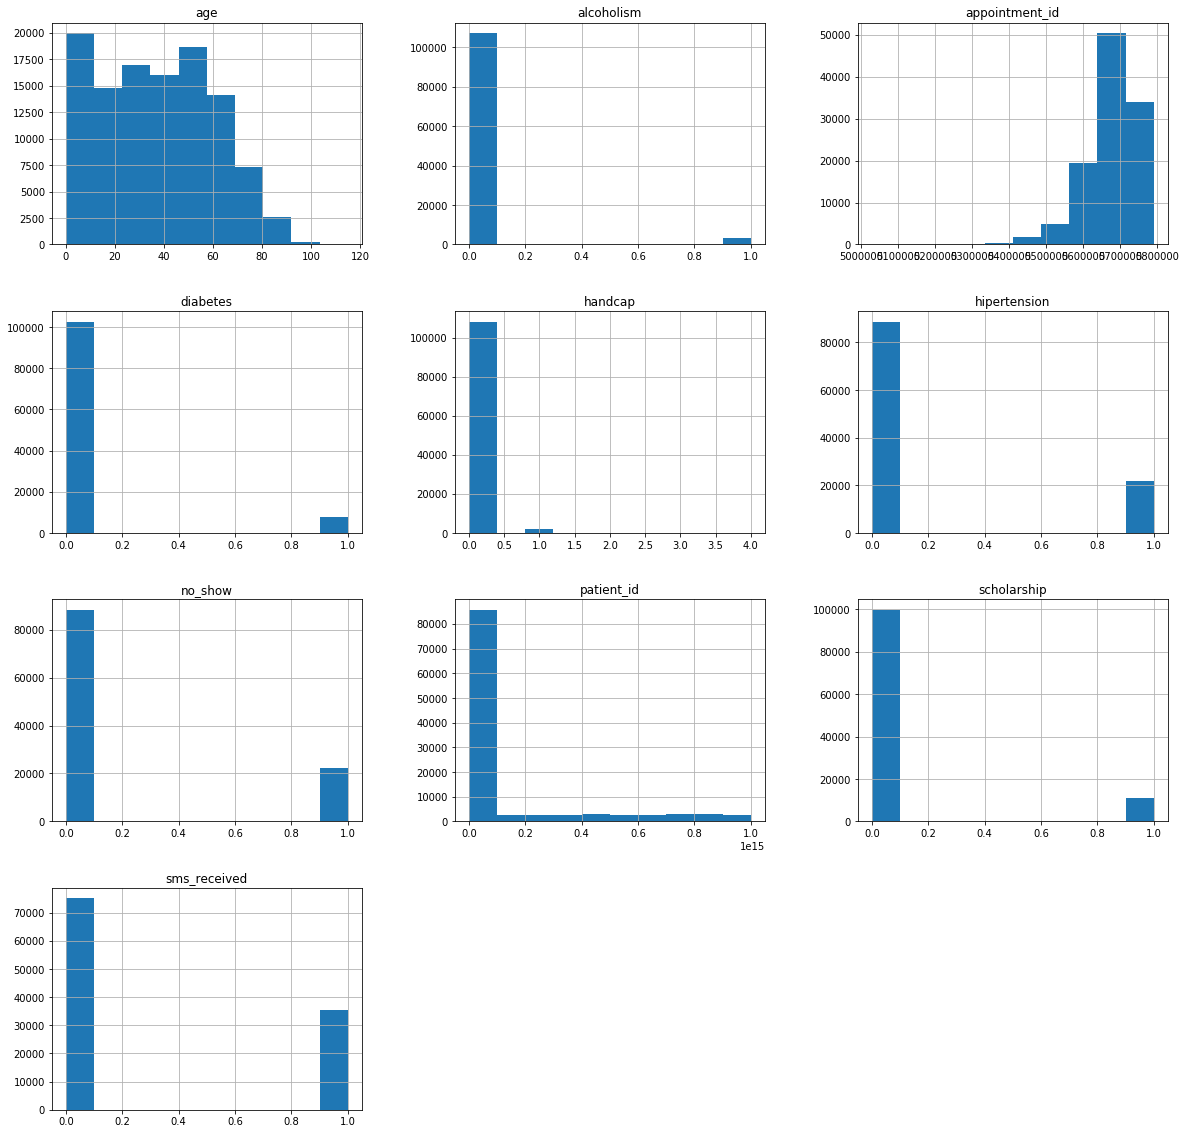

In [24]:
df.hist(figsize=(20,20)); # ploting histograms of all the features in the data set

### what is the percentage of people who didn't show for their appointment?

percentage of people who didn't show for thier appointment = 20.193438647919944


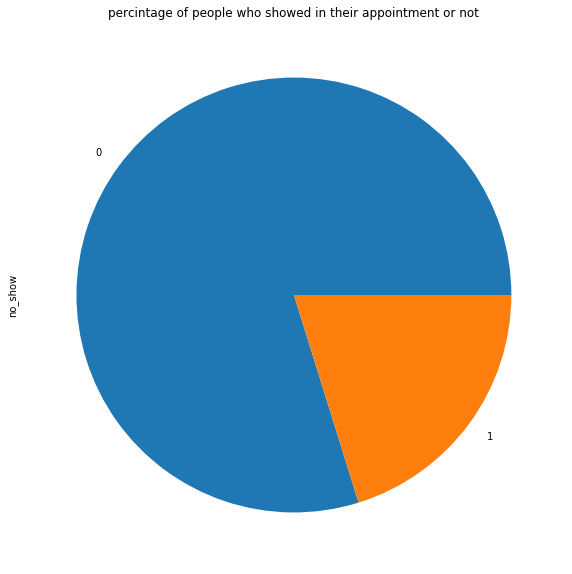

In [25]:
no_show_counts = df['no_show'].value_counts() # getting the numbers of people who showed or didn't show in their appointment
title_str = 'percintage of people who showed in their appointment or not'
no_show_counts.plot.pie(figsize = (10,10),title = title_str) # creating a pie plot
percentage_of_no_show = no_show_counts[1]/no_show_counts.sum() *100 # getting the percentage
print(f'percentage of people who didn\'t show for thier appointment = {percentage_of_no_show}')

### how age affects people attending their appointments?

In [26]:
df.describe()['age'] # get useful statistical description of the age column

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Text(0, 0.5, 'number of people with this age')

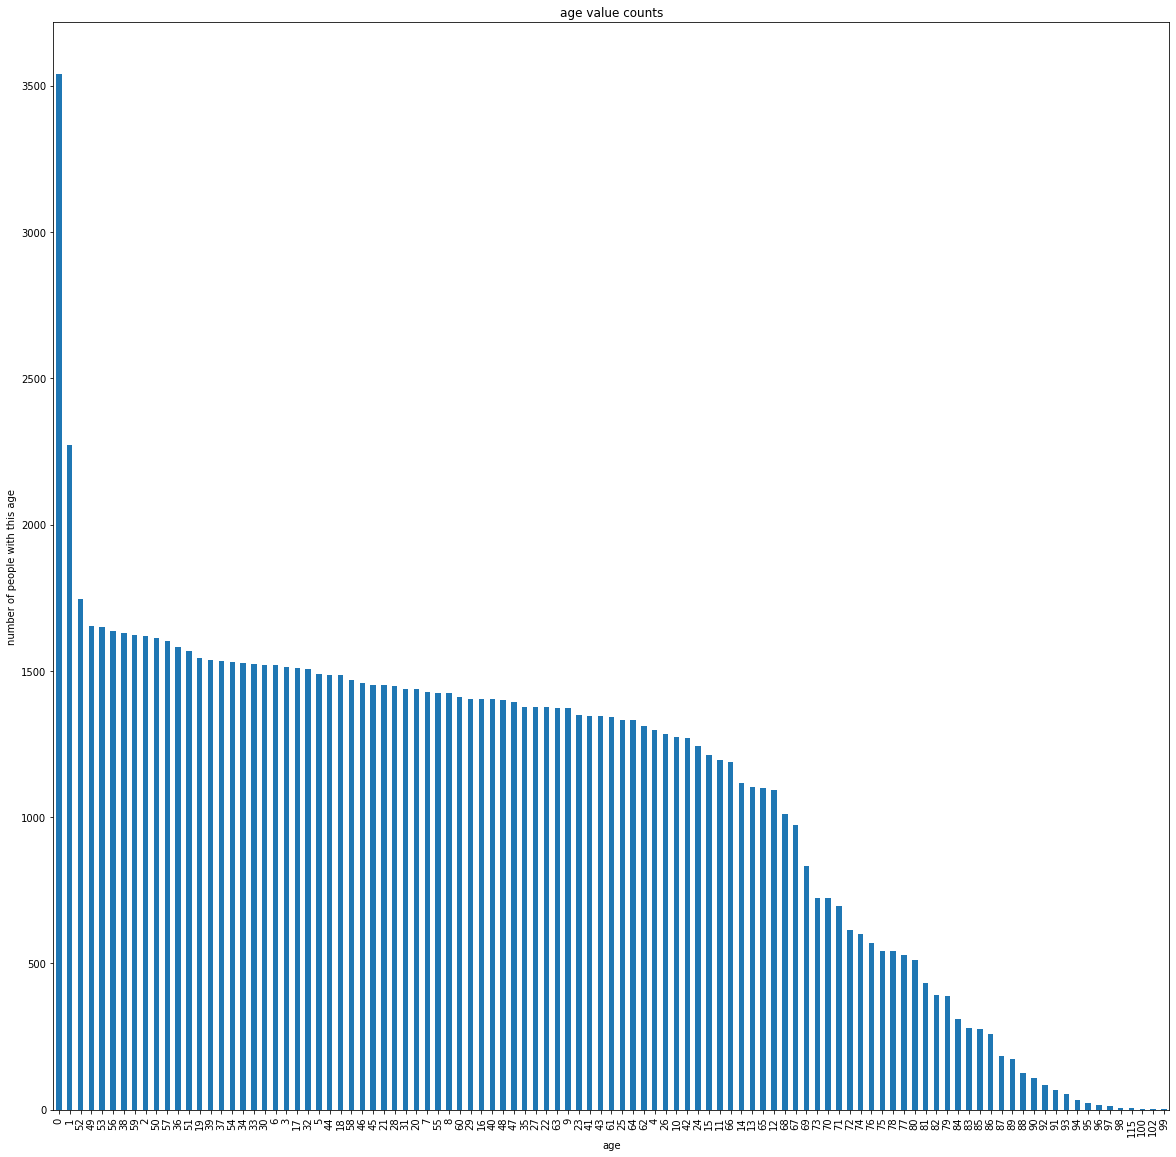

In [27]:
ax = df['age'].value_counts().plot(kind='bar', figsize=(20,20), title='age value counts'); # bar ploting the df_no_show = 0
ax.set_xlabel("age") # adding x label
ax.set_ylabel("number of people with this age")  # adding y label

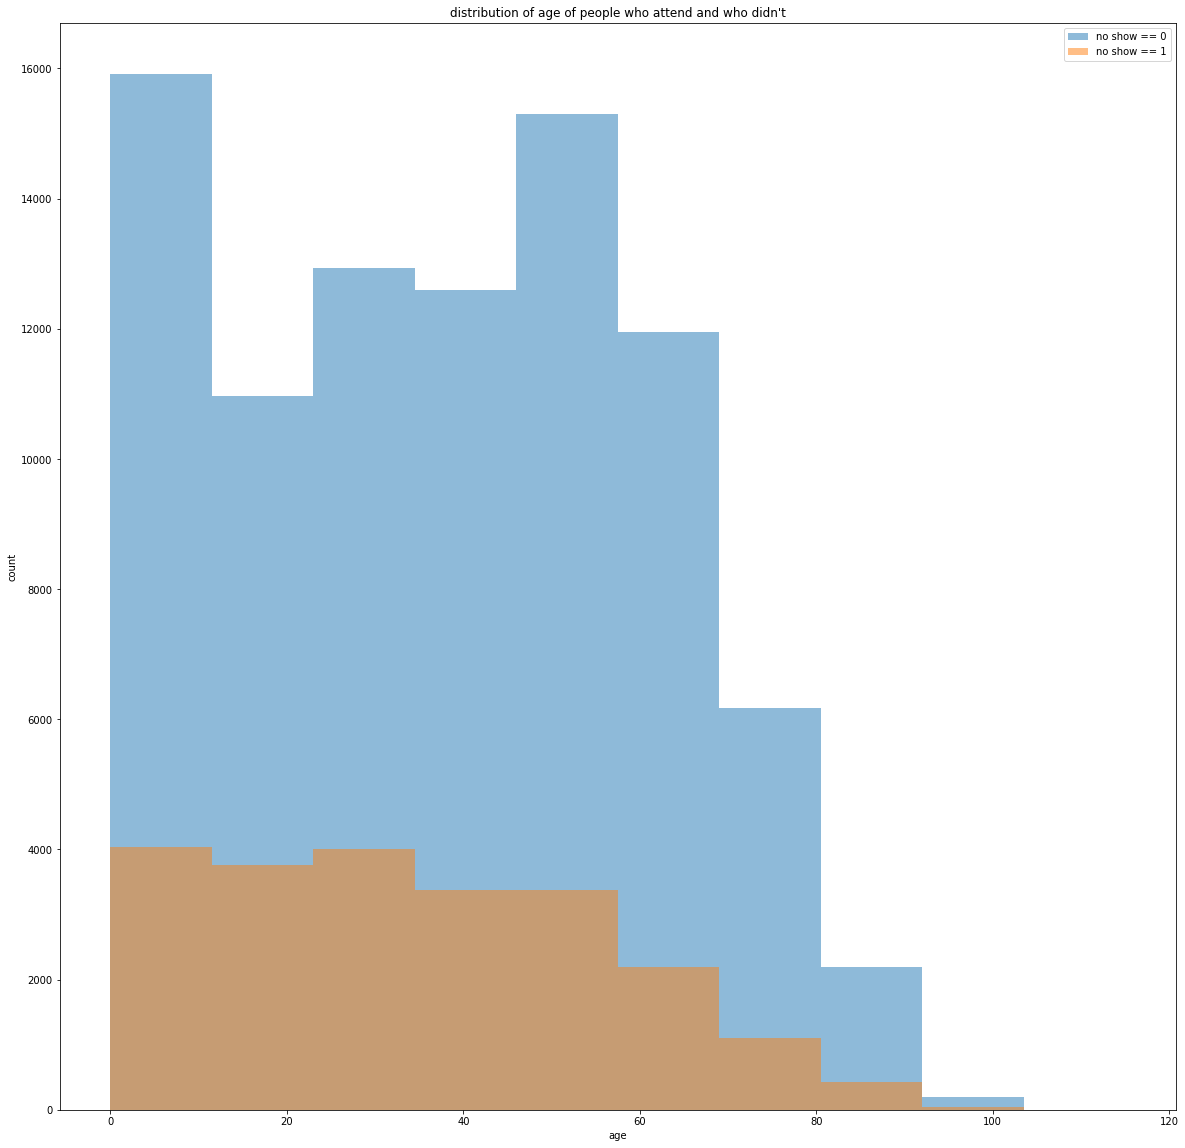

In [28]:
fig, ax = plt.subplots(figsize=(20,20)) # creating subplot to the age distribution
ax.hist(df_no_show_0['age'], alpha = 0.5, label = 'no show == 0') # hist ploting of no_show = 0
ax.legend() # to show legend
ax.hist(df_no_show_1['age'], alpha = 0.5, label = 'no show == 1') # hist ploting of no_show = 1
ax.legend() # to show legend
ax.set_title('distribution of age of people who attend and who didn\'t') # adding title to the plot
ax.set_xlabel('age') # adding x label
ax.set_ylabel('count') # adding y label
plt.show() # to show the plot

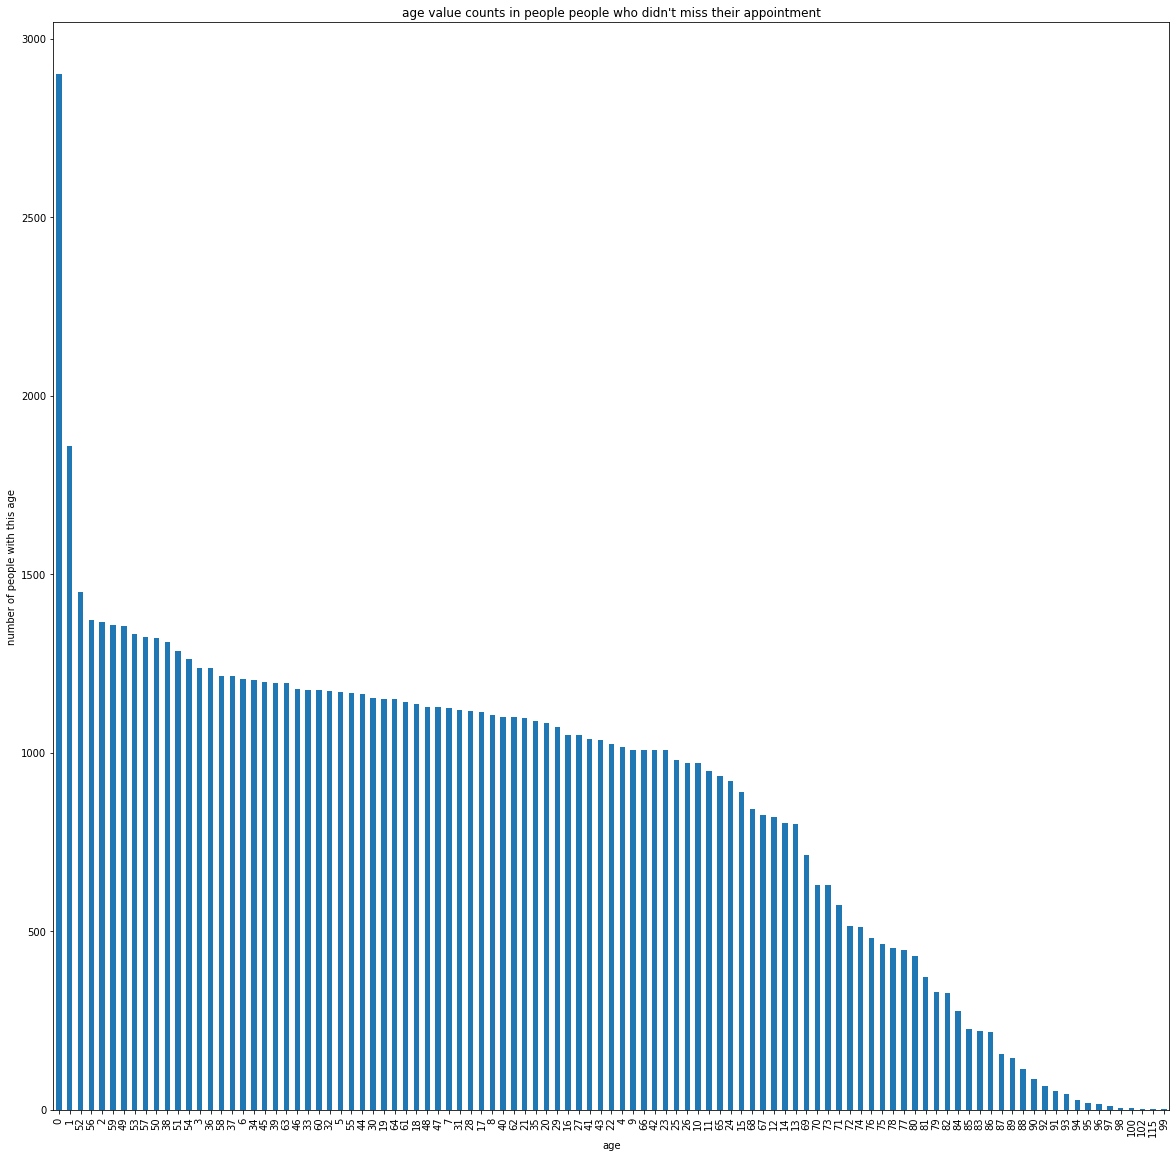

In [29]:
ind = df_no_show_0['age'].value_counts().index # get the index of no_shoe = 0 to get consistant plots
ax = df_no_show_0['age'].value_counts()[ind].plot(kind='bar',figsize=(20,20), title='age value counts in people people who didn\'t miss their appointment'); # bar ploting the df_no_show = 0
ax.set_xlabel("age"); # adding x label
ax.set_ylabel("number of people with this age"); # adding y label

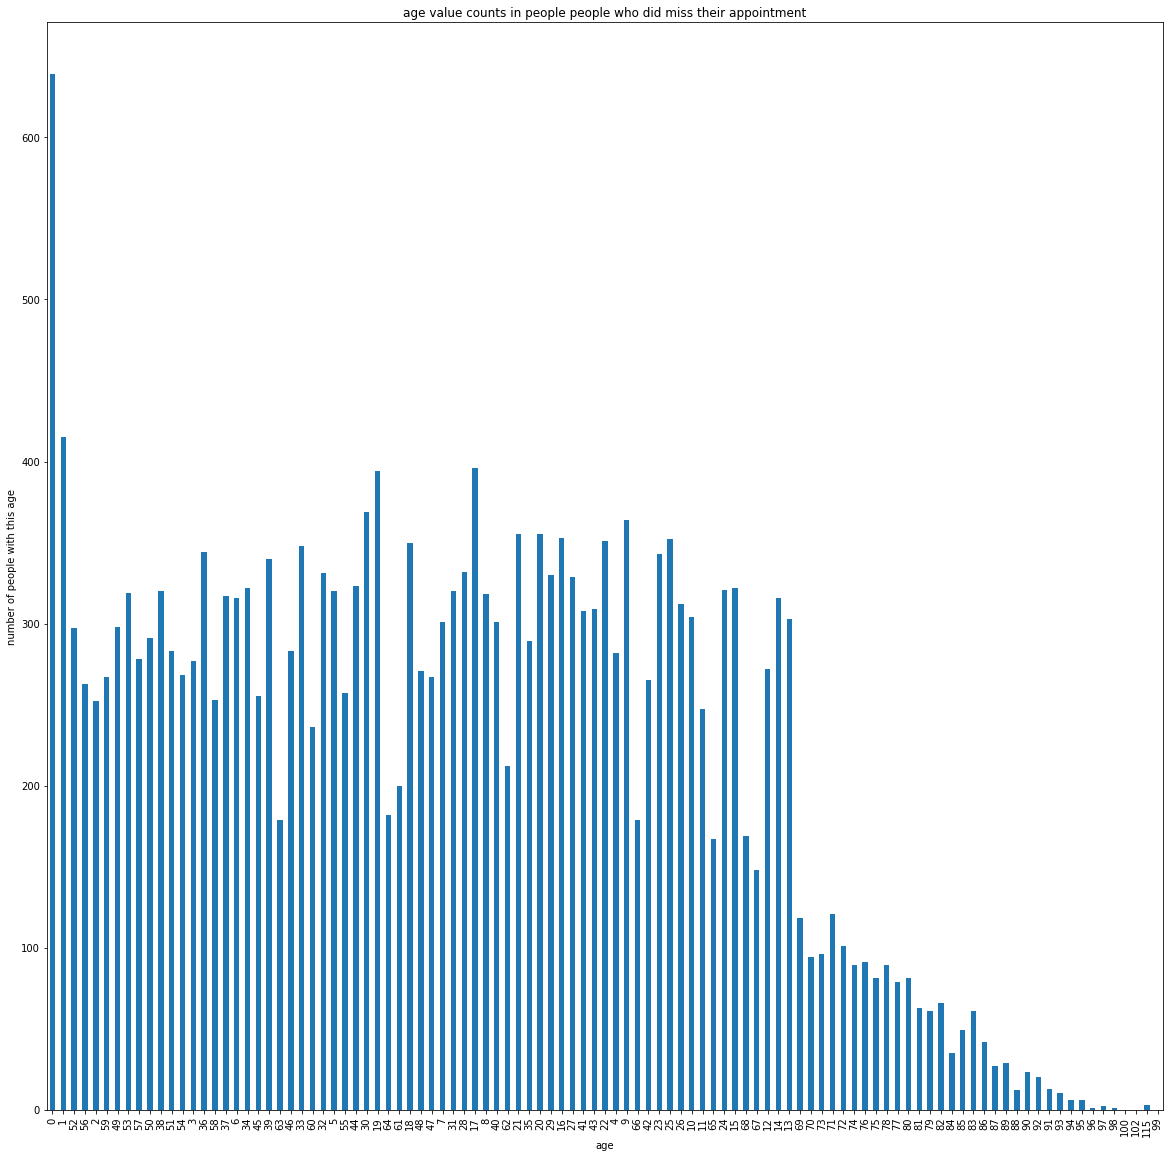

In [30]:
ax = df_no_show_1['age'].value_counts().reindex(ind).plot(kind='bar',figsize=(20,20),title='age value counts in people people who did miss their appointment');# bar ploting the df_no_show = 1 with the index of no_show = 0
ax.set_xlabel("age"); # adding x label
ax.set_ylabel("number of people with this age"); # adding y label

from the above two charts it's clear that there are some people with certain ages that tends to not show in the appointment 

Text(0, 0.5, 'number of people')

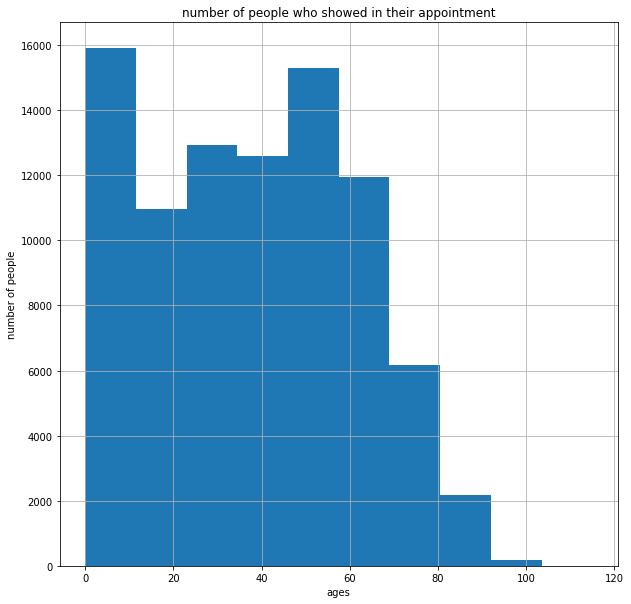

In [31]:
ax = df_no_show_0['age'].hist(figsize=(10,10)) # ploting hist of ages of people who showed in their appointment 
ax.set_title('number of people who showed in their appointment')
ax.set_xlabel('ages')
ax.set_ylabel('number of people')

Text(0, 0.5, 'number of people')

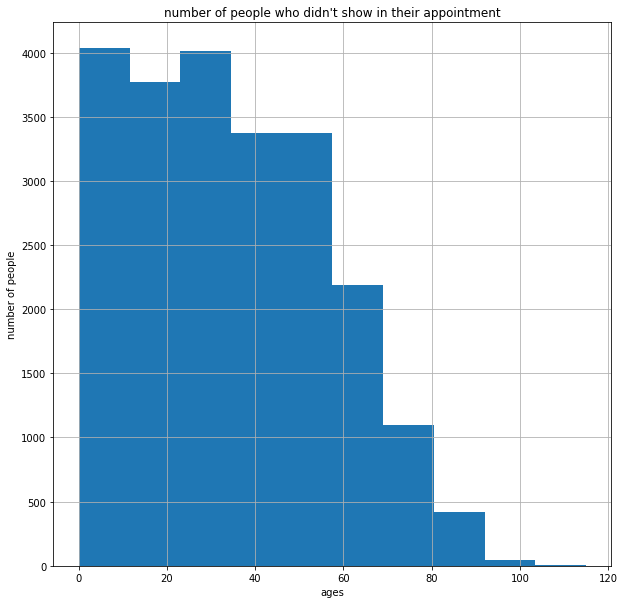

In [32]:
ax = df_no_show_1['age'].hist(figsize=(10,10))  # ploting hist of ages of people who didn't show in their appointment 
ax.set_title('number of people who didn\'t show in their appointment')
ax.set_xlabel('ages')
ax.set_ylabel('number of people')

In [33]:
df_no_show_0['age'].describe() # get useful statistical description of the age column of people who showed in their appointment

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

In [34]:
df_no_show_1['age'].describe() # get useful statistical description of the age column of people who didn't show in their appointment

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

the mean age of people who did not show for an appointment is 34 but the mean age of people who attend is 37 that means younger people tends to not attend their medical appointment than older people it 

it seems that age affects the show and no show data which means that we can use age as a feature if we want to deploy a machine learning model on the data

### now let's investigate the relation between no show and other features

### how the scholarship program affects people's attendance at their appointments?


In [35]:
(df['scholarship'].value_counts()/df['scholarship'].value_counts().sum())*100 # get the percentage of people who are inrolled in bolsa familia program

0    90.173353
1     9.826647
Name: scholarship, dtype: float64

90% of patients in the data is not subscribed in the scholarship program

In [36]:
df_grouped_by_scholarship = df.groupby(['scholarship']).sum()['no_show'] # group the data by scholarship and calculate the no_show data
df_grouped_by_scholarship # printing the numbers of people who didn't show in respect to inrolling in the scholarship program

scholarship
0    19741
1     2578
Name: no_show, dtype: int32

In [37]:
no_show_percintage_to_scholarship = (df_grouped_by_scholarship/df_grouped_by_scholarship.sum()) * 100 # getting the percintage of people who didn't show in respect to inrolling in the scholarship program
no_show_percintage_to_scholarship # printing the percentages

scholarship
0    88.449303
1    11.550697
Name: no_show, dtype: float64

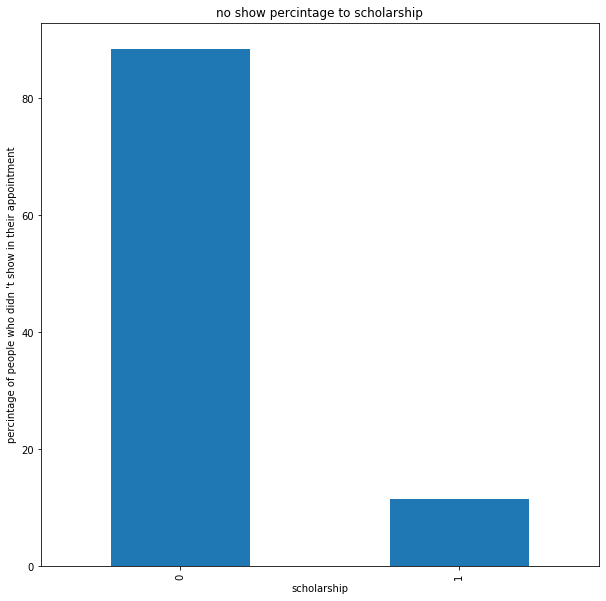

In [38]:
no_show_percintage_to_scholarship.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to inrolling in the scholarship program
plt.title('no show percintage to scholarship') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

we can see from the plot above that 88% of people who didn't show to the appointment was not inrolled in the scholarship(bolsa familia) program 





### how hipertension affect's people attendance at their appointments?

In [39]:
(df['hipertension'].value_counts()/df['hipertension'].value_counts().sum())*100  # get the percentage of people who suffre from hipertension

0    80.275229
1    19.724771
Name: hipertension, dtype: float64

80% of patients in the data doesn't suffer from hipertension

In [40]:
df_grouped_by_hipertension = df.groupby(['hipertension']).sum()['no_show'] # group the data by hipertension and calculate the no_show data
df_grouped_by_hipertension # printing the numbers of people who didn't show in respect to suffring from hipertension

hipertension
0    18547
1     3772
Name: no_show, dtype: int32

In [41]:
no_show_percintage_to_hipertension  = (df_grouped_by_hipertension/df_grouped_by_hipertension.sum()) * 100 # getting the percintage of people who didn't show in respect to suffring from hipertension
no_show_percintage_to_hipertension  # printing the percentages

hipertension
0    83.099601
1    16.900399
Name: no_show, dtype: float64

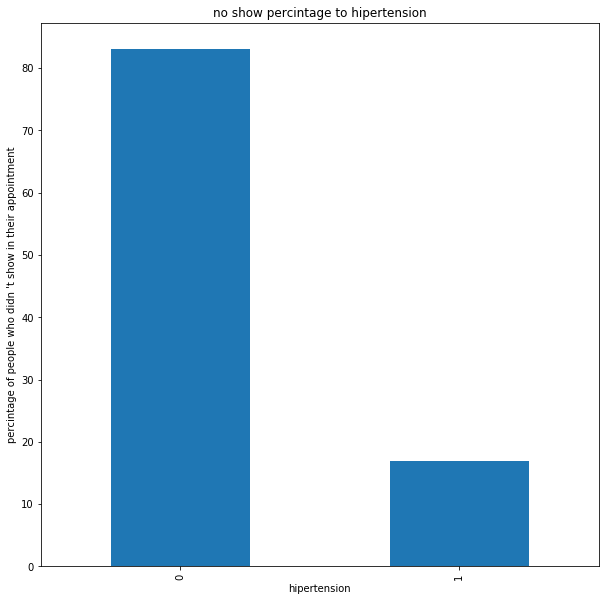

In [42]:
no_show_percintage_to_hipertension.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to suffring from hipertension
plt.title('no show percintage to hipertension') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

we can see from the plot above that 83% of people who didn't show to the appointment didn't suffer from hipertension we can see also that the people who suffer from hipertension tends to not show in their appointment





### how diabetes affects people's attendance at their appointments?


In [43]:
(df['diabetes'].value_counts()/df['diabetes'].value_counts().sum())*100 # get the percentage of people who suffre from diabetes

0    92.813456
1     7.186544
Name: diabetes, dtype: float64

93% of patients in the data doesn't suffer from diabetes

In [44]:
df_grouped_by_diabetes = df.groupby(['diabetes']).sum()['no_show']  # group the data by diabetes and calculate the no_show data
df_grouped_by_diabetes # printing the numbers of people who didn't show in respect to suffring from diabetes

diabetes
0    20889
1     1430
Name: no_show, dtype: int32

In [45]:
no_show_percintage_to_diabetes  = (df_grouped_by_diabetes/df_grouped_by_diabetes.sum()) * 100 # getting the percintage of people who didn't show in respect to suffring from diabetes
no_show_percintage_to_diabetes # printing the percentages

diabetes
0    93.592903
1     6.407097
Name: no_show, dtype: float64

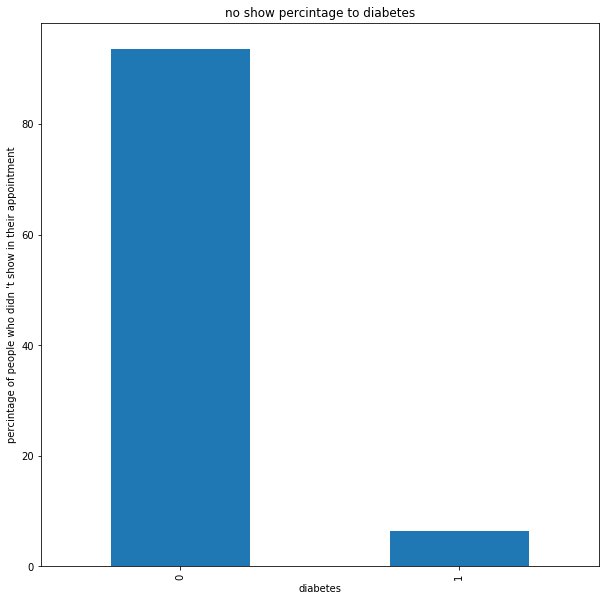

In [46]:
no_show_percintage_to_diabetes.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to suffring from diabetes
plt.title('no show percintage to diabetes') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

 we can see from the plot above that 93.6% of people who didn't show to the appointment didn't suffer from diabetes which is higher than the percentage of the people who don't have diabetes by 0.6% that's mean people who don't have diabetes tends to not attend their appointments more 





### how alcoholism affects people's attendance at their appointments?

In [47]:
(df['alcoholism'].value_counts()/df['alcoholism'].value_counts().sum())*100 # get the percentage of people who suffre from alcoholism

0    96.959991
1     3.040009
Name: alcoholism, dtype: float64

97% of patients in the data doesn't suffer from alcoholism

In [48]:
df_grouped_by_alcoholism = df.groupby(['alcoholism']).sum()['no_show'] # group the data by alcoholism and calculate the no_show data
df_grouped_by_alcoholism # printing the numbers of people who didn't show in respect to suffring from alcoholism

alcoholism
0    21642
1      677
Name: no_show, dtype: int32

In [49]:
no_show_percintage_to_alcoholism  = (df_grouped_by_alcoholism/df_grouped_by_alcoholism.sum()) * 100 # getting the percintage of people who didn't show in respect to suffring from alcoholism
no_show_percintage_to_alcoholism # printing the percentages

alcoholism
0    96.96671
1     3.03329
Name: no_show, dtype: float64

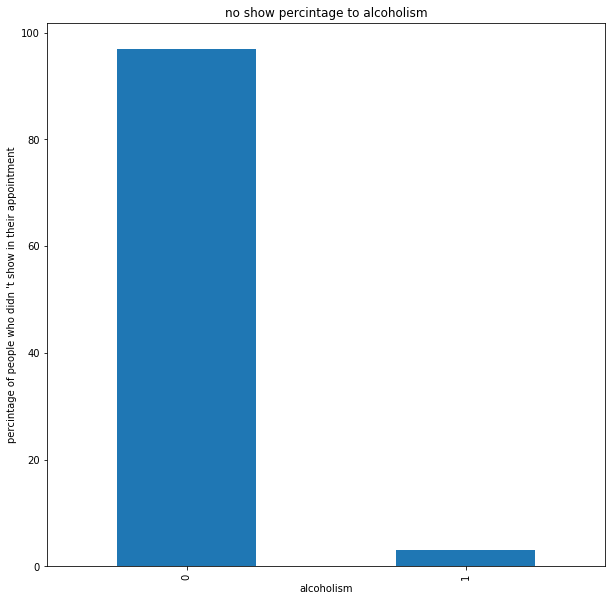

In [50]:
no_show_percintage_to_alcoholism.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to suffring from alcoholism
plt.title('no show percintage to alcoholism') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

 we can see from the plot above that 97% of people who didn't show to the appointment didn't suffer from alcoholism which is the came percentage of the collected data that 97% of patients in the data doesn't suffer from alcoholism





### how handcap affects people's attendance at their appointments?

In [51]:
(df['handcap'].value_counts()/df['handcap'].value_counts().sum())*100 # get the percentage of people who suffre from handcap

0    97.972423
1     1.847529
2     0.165572
3     0.011762
4     0.002714
Name: handcap, dtype: float64

98% of patients in the data doesn't suffer from handcap

In [52]:
df_grouped_by_handcap = df.groupby(['handcap']).sum()['no_show'] # group the data by handcap and calculate the no_show data
df_grouped_by_handcap # printing the numbers of people who didn't show in respect to suffring from handcap

handcap
0    21912
1      366
2       37
3        3
4        1
Name: no_show, dtype: int32

In [53]:
no_show_percintage_to_handcap  = (df_grouped_by_handcap/df_grouped_by_handcap.sum()) * 100 # getting the percintage of people who didn't show in respect to suffring from handcap
no_show_percintage_to_handcap # printing the percentages

handcap
0    98.176442
1     1.639858
2     0.165778
3     0.013441
4     0.004480
Name: no_show, dtype: float64

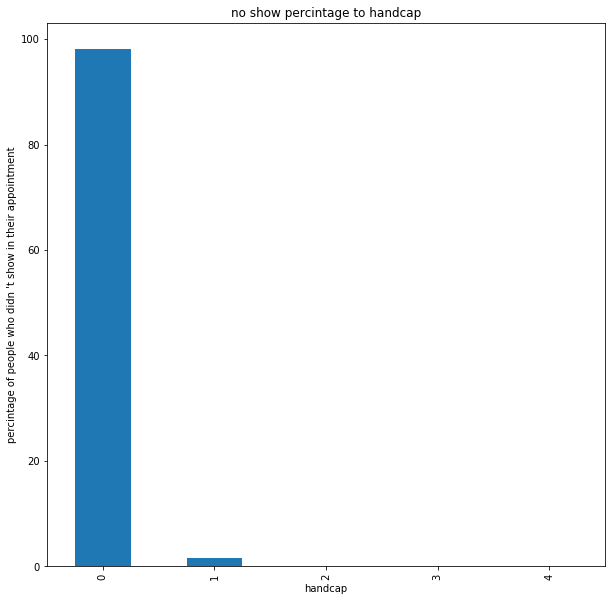

In [54]:
no_show_percintage_to_handcap.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to suffring from handcap
plt.title('no show percintage to handcap') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

we can see from the plot above that 98% of people who didn't show to the appointment didn't suffer from any handcap and only 1.63% suffered from 1 handcap and 0.16% suffered from 2 handcaps and 0.01% suffered from 3 handcaps and 0.004% suffered from 4 handcaps which is the same as the percentage of the total patient with or without handcap




### how SMS receiving affect's people attendance at their appointments?

In [55]:
(df['sms_received'].value_counts()/df['sms_received'].value_counts().sum())*100 # get the percentage of people who received SMS and who didn't

0    67.897146
1    32.102854
Name: sms_received, dtype: float64

67% of patients in the data didn't received an SMS 

In [56]:
df_grouped_by_sms_received = df.groupby(['sms_received']).sum()['no_show'] # group the data by receiving an SMS and calculate the no_show data
df_grouped_by_sms_received # printing the numbers of people who didn't show in respect to receiving an SMS

sms_received
0    12535
1     9784
Name: no_show, dtype: int32

In [57]:
no_show_percintage_to_sms_received  = (df_grouped_by_sms_received/df_grouped_by_sms_received.sum()) * 100 # getting the percintage of people who didn't show in respect to receiving an SMS
no_show_percintage_to_sms_received # printing the percentages

sms_received
0    56.162911
1    43.837089
Name: no_show, dtype: float64

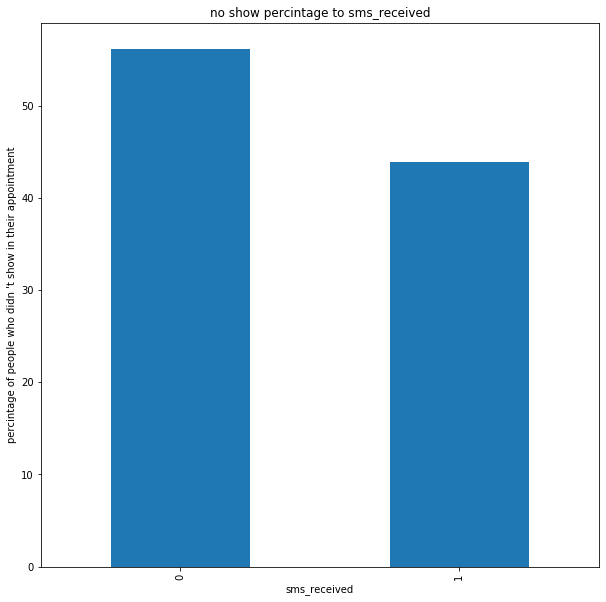

In [58]:
no_show_percintage_to_sms_received.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to receiving SMS
plt.title('no show percintage to sms_received') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

 we can see from the plot above that 56% of people who didn't show to the appointment didn't receive any messages of the appointment




### how the neighborhood affect's people attendance at their appointments?

In [59]:
df['neighbourhood'].value_counts() # get the percentage of people who didn't show in every neighbourhood

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [60]:
df_grouped_by_neighbourhood = df.groupby(['neighbourhood']).sum()['no_show'] # group the data by neighbourhood and calculate the no_show data
df_grouped_by_neighbourhood # printing the numbers of people who didn't show in respect to neighbourhood

neighbourhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
                      ... 
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
UNIVERSITÁRIO           32
VILA RUBIM             141
Name: no_show, Length: 81, dtype: int32

In [61]:
no_show_percintage_to_neighbourhood  = (df_grouped_by_neighbourhood/df_grouped_by_neighbourhood.sum()) * 100 # getting the percintage of people who didn't show in respect to neighbourhood
no_show_percintage_to_neighbourhood # printing the percentages

neighbourhood
AEROPORTO              0.004480
ANDORINHAS             2.334334
ANTÔNIO HONÓRIO        0.224024
ARIOVALDO FAVALESSA    0.277790
BARRO VERMELHO         0.407724
                         ...   
SÃO JOSÉ               1.917649
SÃO PEDRO              2.307451
TABUAZEIRO             2.567319
UNIVERSITÁRIO          0.143376
VILA RUBIM             0.631749
Name: no_show, Length: 81, dtype: float64

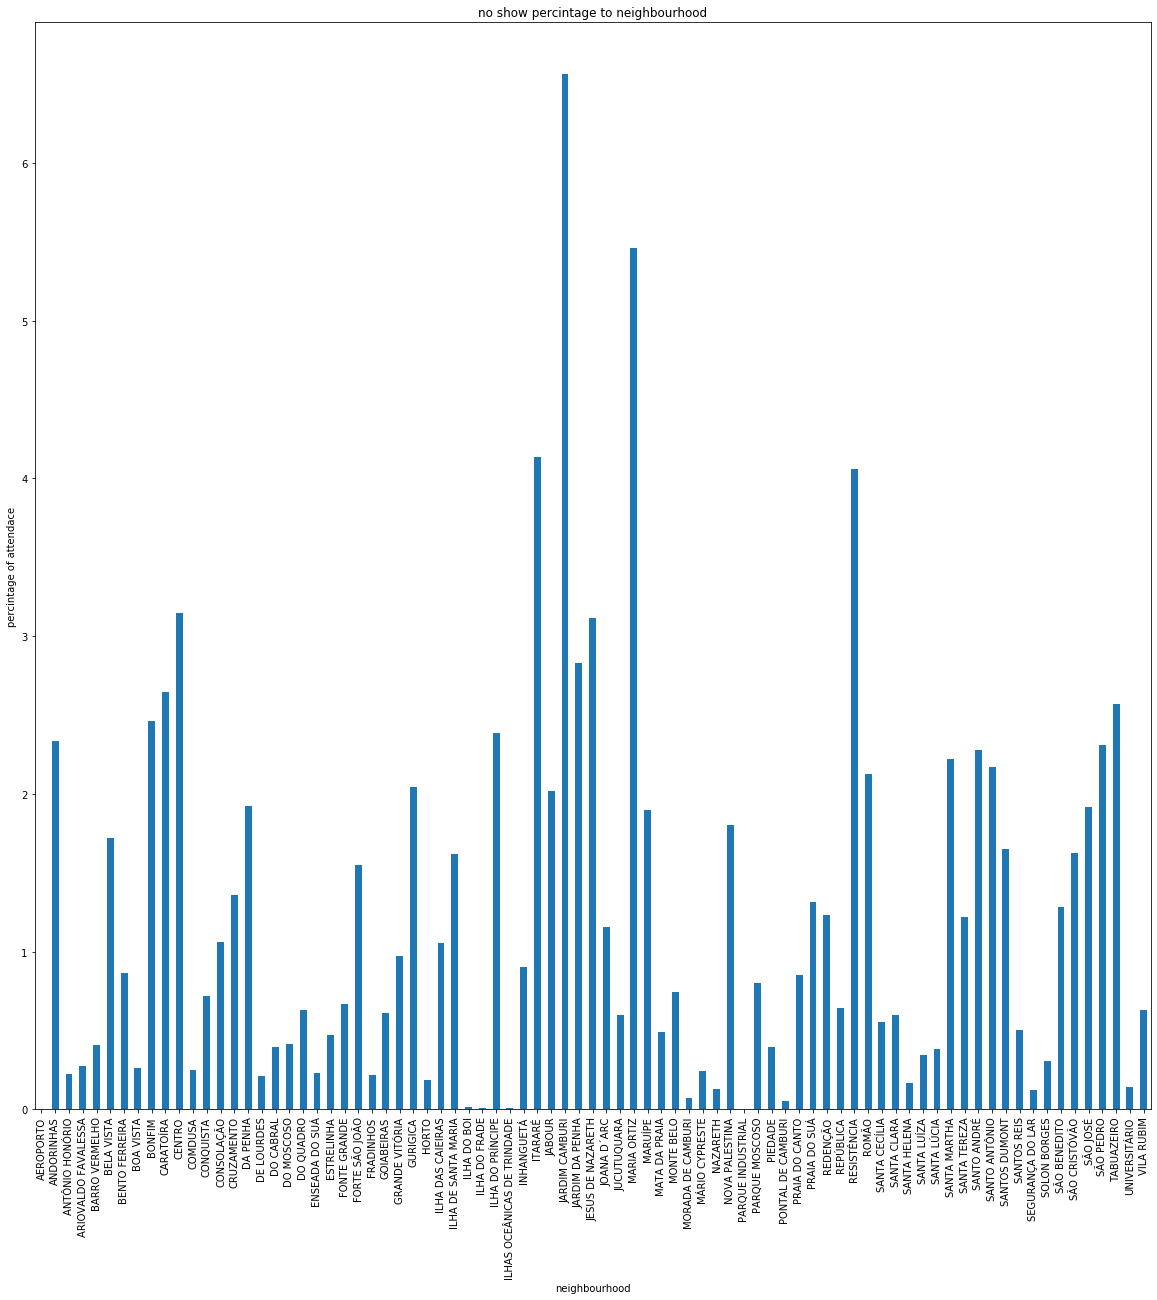

In [62]:
no_show_percintage_to_neighbourhood.plot.bar(figsize=(20,20)) # creating bar plot of people who didn't show in respect to neighbourhood
plt.title('no show percintage to neighbourhood') # adding title to the plot
plt.ylabel('percintage of attendace');  # adding y axes label to the plot

we actually can't get too much from neighbourhood data right now as we don't know the population of every neighbourhood and the educational level and the wealth of the neighbourhood 

### how the day of the week that the appointment was scheduled affects the attendance of people at their appointments?

In [63]:
df['day_of_week'] = df['appointment_day'].dt.day_name() #create a new column in the dataframe that contains the day of the week to this appointment

In [64]:
df # checking the creation of the day_of_week column

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_of_week
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday


In [65]:
df_grouped_by_day_of_week = df.groupby(['day_of_week']).sum()['no_show'] # group the data by day of the week and calculate the no_show data
df_grouped_by_day_of_week # printing the numbers of people who didn't show in respect to day of the week

day_of_week
Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: no_show, dtype: int32

In [66]:
no_show_percintage_to_day_of_week  = (df_grouped_by_day_of_week/df_grouped_by_day_of_week.sum()) * 100 # getting the percintage of people who didn't show in respect to day of the week
no_show_percintage_to_day_of_week # printing the percentages

day_of_week
Friday       18.087728
Monday       21.013486
Saturday      0.040324
Thursday     14.955867
Tuesday      23.083471
Wednesday    22.819123
Name: no_show, dtype: float64

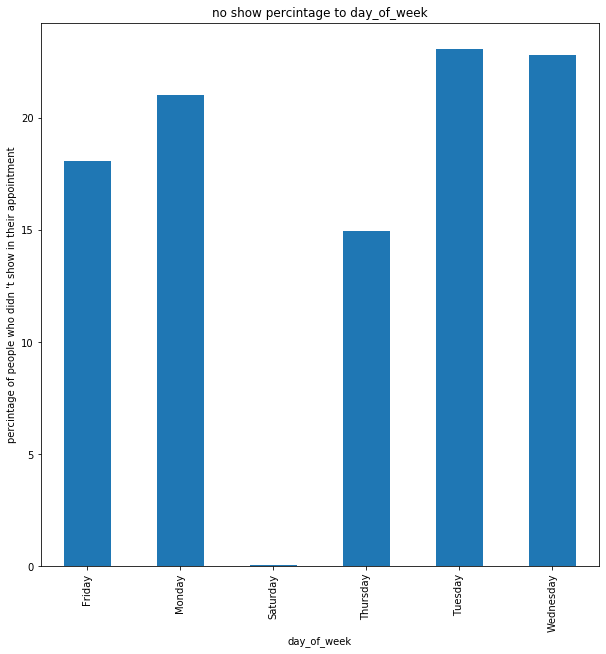

In [67]:
no_show_percintage_to_day_of_week.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to day of the week
plt.title('no show percintage to day_of_week') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

we can see that in Saturday people tends to not miss their appointment and we have no data for Sunday but also it's clear that there are no too many appointments where scheduled in Saturday 

### how gender affect's people attendance at their appointments?

In [68]:
(df['gender'].value_counts()/df['gender'].value_counts().sum())*100 # get the percentage of people who didn't show by gender

F    64.997376
M    35.002624
Name: gender, dtype: float64

from the above we can see that the data set contains 65% females and 35% males 

In [69]:
df_grouped_by_gender = df.groupby(['gender']).sum()['no_show'] # group the data by gender and calculate the no_show data
df_grouped_by_gender # printing the numbers of people who didn't show in respect gender

gender
F    14594
M     7725
Name: no_show, dtype: int32

In [70]:
no_show_percintage_to_gender  = (df_grouped_by_gender/df_grouped_by_gender.sum()) * 100 # getting the percintage of people who didn't show in respect to gender
no_show_percintage_to_gender # printing the percentages

gender
F    65.388234
M    34.611766
Name: no_show, dtype: float64

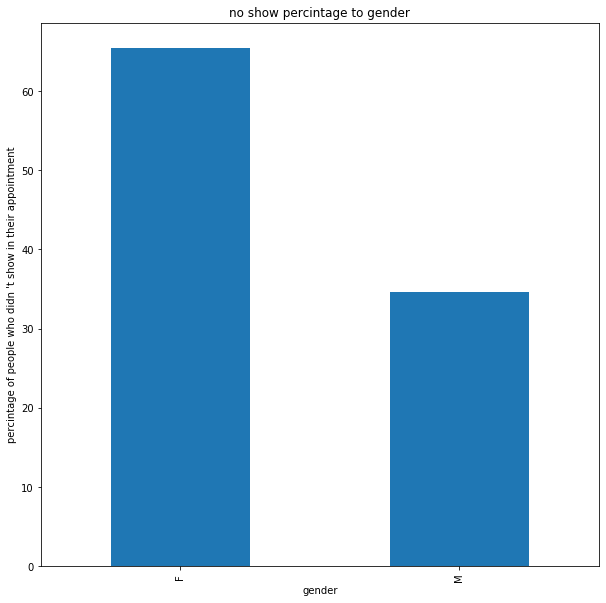

In [71]:
no_show_percintage_to_gender.plot.bar(figsize=(10,10)) # creating bar plot of people who didn't show in respect to gender
plt.title('no show percintage to gender') # adding title to the plot
plt.ylabel('percintage of people who didn \'t show in their appointment'); # adding y label

we can see that the 65% of patients who didn't show to their appointment are females but 65% of the patients data we have is for females so that means the gender doesn't affect the attendance of person to the appointment

## Conclusions


* percentage of people who didn't show for thier appointment = 20.193438647919944

* are some people with certain ages that tends to not show in the appointment
the mean age of people who did not show for an appointment is 34 but the mean age of people who attend is 37 that means younger people tends to not attend their medical appointment than older people it 
it seems that age affects the show and no show data which means that we can use age as a feature if we want to deploy a machine learning model on the data

* 88% of people who didn't show to the appointment was not inrolled in the scholarship(bolsa familia) program 

* 83% of people who didn't show to the appointment didn't suffer from hipertension we can see also that the people who suffer from hipertension tends to not show in their appointment

* 93.6% of people who didn't show to the appointment didn't suffer from diabetes which is higher than the percentage of the people who don't have diabetes by 0.6% that's mean people who don't have diabetes tends to not attend their appointments more

* 97% of people who didn't show to the appointment didn't suffer from alcoholism which is the came percentage of the collected data that 97% of patients in the data doesn't suffer from alcoholism

* 98% of people who didn't show to the appointment didn't suffer from any handcap and only 1.63% suffered from 1 handcap and 0.16% suffered from 2 handcaps and 0.01% suffered from 3 handcaps and 0.004% suffered from 4 handcaps which is the same as the percentage of the total patient with or without handcap

* 67% of patients in the data didn't received an SMS 

* 56% of people who didn't show to the appointment didn't receive any messages of the appointment

* we can't get too much from neighbourhood data right now as we don't know the population of every neighbourhood and the educational level and the wealth of the neighbourhood 

* in Saturday people tends to not miss their appointment and we have no data for Sunday but also it's clear that there are no too many appointments where scheduled in Saturday 

* 65% of patients who didn't show to their appointment are females but 65% of the patients data we have is for females so that means the gender doesn't affect the attendance of person to the appointment

## Limitations 

* the data set doesn't provide any useful information like what is the distance between the patient and where the appointment will take place

* It will be nice if **how much a patient makes every year** was provided in the data set and **the educational level of the patient** and **whether the patient is an employer or not**

* there was some illogical data sets like the **age = -1** case and also there are too many rows of **age = 0** patients which for sure are **babies** which means they have no choice to attend the medical appointment or not and **their parents are the only ones who decides**